In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [10]:
from helpers import load_data

# load dataset
x, y = load_data()

In [11]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

seed = 1
degree = 7
k_fold = 4
k_indices = build_k_indices(y, k_fold, seed)
print(k_indices)    

[[27 35 40 38  2  3 48 29 46 31 32 39]
 [21 36 19 42 49 26 22 13 41 17 45 24]
 [23  4 33 14 30 10 28 44 34 18 20 25]
 [ 6  7 47  1 16  0 15  5 11  9  8 12]]


In [16]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    selector_tr = [row for row in range(k_indices.shape[0]) if row != k]
    index_tr = k_indices[selector_tr].flatten()
    #print("index_tr = ", index_tr)
    index_te = k_indices[k].flatten()
    #print("index_te = ", index_te)
    x_te = x[index_te]
    y_te = y[index_te]
    x_tr = x[index_tr]
    y_tr = y[index_tr]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_te = build_poly(x_te, degree)
    tx_tr = build_poly(x_tr, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_tr = ridge_regression(y_tr, tx_tr, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_te = np.sqrt(2*compute_mse(y_te, tx_te, w_tr))
    loss_tr = np.sqrt(2*compute_mse(y_tr, tx_tr, w_tr))
    #loss_te = compute_mse(y_te, tx_te, w_tr)
    #loss_tr = compute_mse(y_tr, tx_tr, w_tr)
    return loss_tr, loss_te

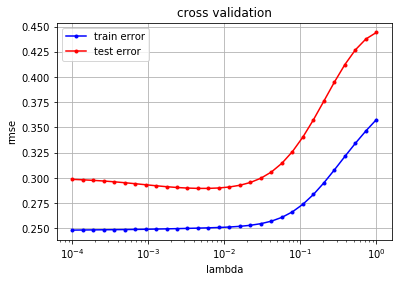

In [18]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    
    for ind, lambda_ in enumerate(lambdas):
        tmp_tr = 0
        tmp_te = 0
        for k in range (0, k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            #print( lambda_, k, loss_tr,loss_te )
            tmp_tr += loss_tr
            tmp_te += loss_te
        tmp_tr /= k_fold
        tmp_te /= k_fold
        rmse_tr.append(tmp_tr)
        rmse_te.append(tmp_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [6]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NotImplementedError: 